In [1]:
from matplotlib import pyplot as plt
import numpy as np
import time
import re

In [2]:
###David R. Rice
###Phys 604 Prof. Zhu
###Week 2 Homework

In [3]:
##Jan 21st Fibonacci Methods Comparison

In [4]:
#Memorization Method
def fib3(n, table):
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib3(n-1, table) + fib3(n-2, table)
        
    return table[n]

#Fill the table with 20 Fibonacci numbers
n=20
table = [None]*(n+1)
Filltable=fib3(n,table)
print(table)
print(len(table))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
21


In [5]:
#Graph F_n/F_(n-1), Golden Ratio ~1.6180339887498948482045868

table.pop(0)
x=np.arange(2,21)
y=[]
for i in x-2:
    y.append(table[i+1]/table[i])
    
print(x)
print(len(x))
print(y)
print(len(y))

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
19
[1.0, 2.0, 1.5, 1.6666666666666667, 1.6, 1.625, 1.6153846153846154, 1.619047619047619, 1.6176470588235294, 1.6181818181818182, 1.6179775280898876, 1.6180555555555556, 1.6180257510729614, 1.6180371352785146, 1.618032786885246, 1.618034447821682, 1.6180338134001253, 1.618034055727554, 1.6180339631667064]
19


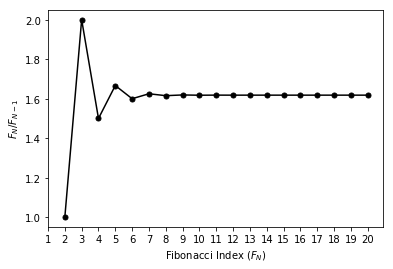

In [6]:
plt.plot(x,y,'k',marker='o',markersize=5)
plt.xlabel("Fibonacci Index "+r'($F_{N}$)')
plt.ylabel(r"$F_{N}/F_{N-1}$")
plt.xticks(np.arange(1,21))
plt.show()

In [7]:
##Calculate the time spent by each fibonocci method and output to file
f=open('fibtime.txt','w')

In [8]:
#Recursion Method
f.write('Recursion Method \n')

def fib2(n):
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)
    
n0=[2,20]
for i in n0:
    f.write('%d     ' %i)
    start_time=time.time()
    print(fib2(i))
    thetime=(time.time() - start_time)
    f.write('%s seconds \n' %thetime)

1
6765


In [9]:
#Tabulation Method
f.write('\n Tabulation Method \n')

def fib4(n):      
    table=[0]*(n+1)
    table[1] = 1
    
    for i in range(2,n+1):
        table[i]=table[i-1]+table[i-2]
    return table[n]

n1=[2,20,200,2000,20000,200000]
for i in n1:
    f.write('%d     ' %i)
    start_time=time.time()
    print(fib4(i))
    thetime=(time.time() - start_time)
    f.write('%s seconds \n' %thetime)


1
6765
280571172992510140037611932413038677189525
4224696333392304878706725602341482782579852840250681098010280137314308584370130707224123599639141511088446087538909603607640194711643596029271983312598737326253555802606991585915229492453904998722256795316982874482472992263901833716778060607011615497886719879858311468870876264597369086722884023654422295243347964480139515349562972087652656069529806499841977448720155612802665404554171717881930324025204312082516817125
253116232373236124224015500352060729176635648580248527895192984199131278176054131523015342346375883163744348821921103768903367353146274288532972407155518761802693163044919315892277133164230203033197109868923578084347825850277920029363565189748330968604286099636444351455877215604369140415581957298497175427851311248798589271822959332948357853141914880538028162426090036299355691663861393997707468501618825858431232913952639355809684081297042295241855899185577230688244257485558923716521991223820131118474907513732298765604986630536

In [10]:
#Matrix Method
f.write('\n Matrix Method \n')

def arrpow(arr, n): 
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]], # array multiply itself
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:   # if n is an odd number, multiple another arr
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n): 
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0] 
    return f
    
n2=[2,20,200,2000,20000,200000]
for i in n2:
    f.write('%d     ' %i)
    start_time=time.time()
    print(fib5(i))
    thetime=(time.time() - start_time)
    f.write('%s seconds \n' %thetime)

1
6765
280571172992510140037611932413038677189525
4224696333392304878706725602341482782579852840250681098010280137314308584370130707224123599639141511088446087538909603607640194711643596029271983312598737326253555802606991585915229492453904998722256795316982874482472992263901833716778060607011615497886719879858311468870876264597369086722884023654422295243347964480139515349562972087652656069529806499841977448720155612802665404554171717881930324025204312082516817125
253116232373236124224015500352060729176635648580248527895192984199131278176054131523015342346375883163744348821921103768903367353146274288532972407155518761802693163044919315892277133164230203033197109868923578084347825850277920029363565189748330968604286099636444351455877215604369140415581957298497175427851311248798589271822959332948357853141914880538028162426090036299355691663861393997707468501618825858431232913952639355809684081297042295241855899185577230688244257485558923716521991223820131118474907513732298765604986630536

In [11]:
f.close()

In [12]:
#Input File and make lists to graph
f1=open('fibtime.txt','r')
lines=f1.readlines()
n_rec=[]
time_rec=[]
for line in lines[1:len(n0)+1]:
    div=re.split('\s+',line)
    n_rec.append(float(div[0]))
    time_rec.append(float(div[1]))
n_tab=[]
time_tab=[]
for line in lines[len(n0)+3:len(n0)+len(n1)+3]:
    div=re.split('\s+',line)

    n_tab.append(float(div[0]))
    time_tab.append(float(div[1]))
    
n_mat=[]
time_mat=[]
for line in lines[len(n0)+len(n1)+5:len(n0)+len(n1)+len(n2)+5]:
    div=re.split('\s+',line)
    n_mat.append(float(div[0]))
    time_mat.append(float(div[1]))     


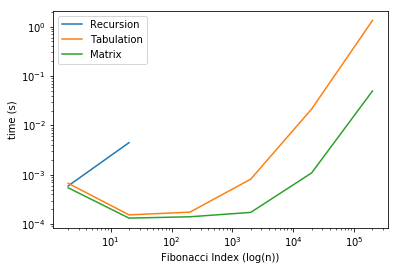

In [13]:
#Graph time vs fibonacci index for each method
plt.loglog(n_rec,time_rec,label="Recursion")
plt.loglog(n_tab,time_tab,label='Tabulation')
plt.loglog(n_mat,time_mat,label='Matrix')
plt.legend()
plt.xlabel('Fibonacci Index (log(n))')
plt.ylabel('time (s)')
plt.show()